# Data Cleansing and Preparation:
## The following data cleansing and preparation steps were followed by the work in the source below:
### https://www.kaggle.com/code/chethuhn/anomaly-detection-in-network-dataset
## The Random Forest Decision Tree model implementation, analysis, and evaluation are unique to this project.set

In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../../../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../../../data\.gitkeep
../../../data\Android_Malware.csv
../../../data\dataset_phishing.csv
../../../data\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
../../../data\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
../../../data\Friday-WorkingHours-Morning.pcap_ISCX.csv
../../../data\Monday-WorkingHours.pcap_ISCX.csv
../../../data\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
../../../data\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
../../../data\Tuesday-WorkingHours.pcap_ISCX.csv
../../../data\Wednesday-workingHours.pcap_ISCX.csv


In [84]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
df=pd.read_csv("../../../data/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191029,53,171,2,2,80,272,40,40,40.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191030,53,222,2,2,90,354,45,45,45.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191031,123,16842,1,1,48,48,48,48,48.0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [87]:
## list of columns
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [90]:
## Types of dtypes present in the dataframe
set(list(df.dtypes))

{dtype('int64'), dtype('float64'), dtype('O')}

In [92]:
## to identify which columns has the "Object" data
categorical_columns=[col for col in df.columns if df[col].dtype=="O"]
categorical_columns

[' Label']

In [94]:
## Categorical Data
df_Categorical=df[categorical_columns]
df_Categorical

,Label
0,BENIGN
1,BENIGN
2,BENIGN
3,BENIGN
4,BENIGN
...,...
191028,BENIGN
191029,BENIGN
191030,BENIGN
191031,BENIGN


In [96]:
# Numerical data
df_Numerical=df.copy()
df_Numerical.drop([" Label"],axis=1,inplace=True)
## cols = df.select_dtypes(include=['float64','int64']).columns

df_Numerical

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,15,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,15,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,21,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.000000,...,3,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191029,53,171,2,2,80,272,40,40,40.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191030,53,222,2,2,90,354,45,45,45.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191031,123,16842,1,1,48,48,48,48,48.0,0.000000,...,0,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0


( Label
 BENIGN    189067
 Bot         1966
 Name: count, dtype: int64,
 <Axes: xlabel=' Label', ylabel='count'>)

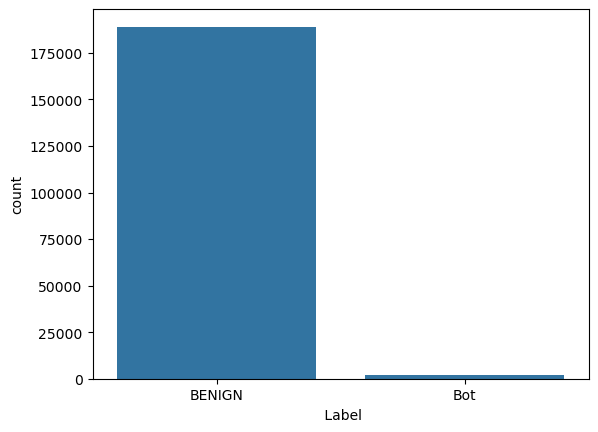

In [98]:
##  To check the Counts of each Class in the dependent Variable
df_Categorical[" Label"].value_counts(),sns.countplot(x=df_Categorical[' Label'])

In [99]:
## To check Unique values in the data 
for i in df_Numerical.columns:
    #if df[i].unique()<
    print(f" {i} Column has {df[i].nunique()} unique values and those are {df[i].unique()}\n\n")

  Destination Port Column has 16089 unique values and those are [ 3268   389     0 ...  4997 33279 33280]


  Flow Duration Column has 91470 unique values and those are [112740690 112740560 113757377 ...  60921076 116036371     16842]


  Total Fwd Packets Column has 505 unique values and those are [    32    545     22      4      7      1      9     13     11     21
     20      2     25      3     48     46    460    388      6     49
    206     14     24     19     27    124    360     12     10      8
    132      5     33    270     15     39    171     16     43     64
    380    108     36     17     38     35    264    252     28     18
     96     29     82     23    156   1161    468     98     53    343
   3694   1227    120     41     68     52     30     26     37    653
     62     54     55     47    106     57    138     86     83     67
    131     79     69     45   1303     63    105    118     81     40
    134     34     31     70     72     61     74   3799    2

In [101]:
for i in df_Numerical.columns:
    if df[i].isnull().sum()>0:
        print(i)

Flow Bytes/s


In [104]:
## We are having nan values in this column
df_Numerical["Flow Bytes/s"].isnull().sum()

28

In [106]:
## To check the dependent column data , when the data is nan
#nan_rows = df[df["Flow Bytes/s"].isnull()]
for index, row in df_Numerical.iterrows():
    if pd.isna(row["Flow Bytes/s"]):
        print(row["Flow Bytes/s"],df_Categorical[" Label"].iloc[index])

nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN


## from the above data we can see that Dependent column data for missing rows are Normal or BENIGN , so we are going to delete all rows ,because it is only small numbers, Total 28 Rows of missing rows are deleted

In [108]:
## Drop the nan values 
df_Numerical.dropna(inplace=True)

## To check the  Dataframe has finite numerical values or not

In [110]:
## To check this funtion all columns should be numerical data types like int,float  should not include "Object datatype"
np.all(np.isfinite(df_Numerical.values))

False

### From this we funtion , the data contains np.inf value ie, Infinity value in the data

In [112]:
## To check total sum of the infinite values in the data
np.isinf(df_Numerical).values.sum()
## To check all values of dataframe are finite
#np.all(np.isfinite(df.values))
#np.all(np.isinf(df))

188

## Count how many of these values belongs to BENIGN OR BOT

In [118]:
#infintie_column_list=[]
#count={}
#list1=df_Numerical.columns
#for index,row in df_Numerical.iterrows():
 #   for j in list1:
  #      if np.isfinite(row[j])==False:
 #           infintie_column_list.append(j)
  #          count[j]=
    #        print(f" This column '{j}' has infinity value in {index} ,this looks like {row[j]}\n")#

In [120]:
#infinite_column_list = []

# Iterate through the rows of the DataFrame
#for index, row in df_Numerical.iterrows():
 #   for column in df_Numerical.columns:
#        if not np.isfinite(row[column]):
            # Add the column name to the list of columns with infinite values
  #          infinite_column_list.append(column)
            #print(f"Row {index}: Column '{column}' has infinite value: {row[column]}")

# Remove duplicates from the list of columns with infinite values
#infinite_column_list = list(set(infinite_column_list))

# Print the list of columns with infinite values
#print("\nColumns with infinite values:")
#print(infinite_column_list)


## To know which columns have ifninity values and how many numbers are there and also their index number 

In [123]:
import numpy as np

infinite_column_count = {}  # Dictionary to store counts
infinite_Value_index_num = []  # List to store index numbers

# Iterate through the columns
for column in df_Numerical.columns:
    count = 0  # Initialize count for the current column
    for index, value in enumerate(df_Numerical[column]):
        if not np.isfinite(value):
            count += 1  # Increment count for non-numeric (infinite) values
            infinite_Value_index_num.append(index)  # Append the index number
    if count > 0:
        infinite_column_count[column] = count  # Store count in the dictionary

# Convert the list of index numbers to a set to remove duplicates
infinite_Value_index_num = set(infinite_Value_index_num)

# Print the dictionary and the set of index numbers
print("Counts of non-numeric (infinite) values in each column:")
print(f"{infinite_column_count}\n")

print("Index numbers of non-numeric (infinite) values:")
print(infinite_Value_index_num)


Counts of non-numeric (infinite) values in each column:
{'Flow Bytes/s': 94, ' Flow Packets/s': 94}

Index numbers of non-numeric (infinite) values:
{11778, 188931, 163844, 57872, 134161, 99347, 121373, 51746, 135208, 105006, 134190, 168500, 106551, 4153, 64057, 117825, 143945, 604, 106596, 87655, 48239, 38005, 13950, 61066, 170122, 75916, 76428, 106638, 4752, 25233, 186009, 28314, 81055, 118442, 29367, 90305, 85699, 3786, 118987, 70348, 190155, 75983, 14039, 12503, 39129, 172761, 37606, 41704, 23785, 42730, 112367, 116984, 83704, 127745, 145671, 61710, 24344, 13093, 107301, 79148, 41265, 40756, 68916, 110916, 33623, 36700, 100188, 14183, 9581, 63853, 114031, 4466, 131978, 30603, 31115, 161688, 154012, 37281, 47522, 126379, 34223, 113071, 124338, 33718, 177098, 45515, 132555, 173003, 16846, 17874, 40405, 33773, 34802, 125944}


In [124]:
Benign=0
bot=0
for i in infinite_Value_index_num:
    if df_Categorical[" Label"].iloc[i]=="BENIGN":
        Benign+=1
    else:
        bot+=1
        
print(f" Benign counts are {Benign}\n\n")
print(f" bot counts are {bot}")

 Benign counts are 94


 bot counts are 0


## Since we only have 188 rows which has "inf" data , Compared to all the data we have , this data is less so we can delete the rows 
Note: We can try to replace this values with Maximum value based on accuracy of the model

In [126]:
## Replace the infinite values with nan values and then delete each row 
df_Numerical.replace([np.inf, -np.inf], np.nan, inplace=True)
df_Numerical.dropna(inplace=True)

In [127]:
## To confirm once again is there any nan or infinite values
## To check total sum of the infinite values in the data
#np.isinf(df_Numerical).values.sum(),np.any(np.isnan(df_Numerical))
np.all(np.isinf(df_Numerical)),np.any(np.isnan(df_Numerical))

(False, False)

In [132]:
# To check is there any nan values 
#np.any(np.isnan(df)),  np.all(np.isfinite(df))
#np.isfinite(df[' Destination Port'].iloc[1])

### There is no nan values and there are all finite values

In [135]:
df_Numerical

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,15,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,15,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,21,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.000000,...,3,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191029,53,171,2,2,80,272,40,40,40.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191030,53,222,2,2,90,354,45,45,45.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191031,123,16842,1,1,48,48,48,48,48.0,0.000000,...,0,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0


In [137]:
df_Numerical.shape,df_Categorical.shape

((190911, 78), (191033, 1))

### Since we have deleted some rows in the Numerical data, we want that data in the Categorical data ,Thats why the rows size is different in both

In [140]:
# Create a list of index numbers from df_Numerical
index_numbers_to_fetch = df_Numerical.index.tolist()

# Fetch the corresponding rows from df_Categorical
df_Categorical = df_Categorical.loc[index_numbers_to_fetch]

# df_Categorical_subset now contains the rows from df_Categorical that correspond to the index numbers in df_Numerical

In [142]:
df_Categorical.shape

(190911, 1)

## Convert the Dependent data into Numerical using One hot Encoding 

In [145]:
## Dependent data 
y=pd.get_dummies(data=df_Categorical[" Label"], drop_first=True)
y

,Bot
0,False
1,False
2,False
3,False
4,False
...,...
191028,False
191029,False
191030,False
191031,False


In [147]:
# Independent data
df_Numerical

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,15,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,15,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,21,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.000000,...,3,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191029,53,171,2,2,80,272,40,40,40.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191030,53,222,2,2,90,354,45,45,45.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191031,123,16842,1,1,48,48,48,48,48.0,0.000000,...,0,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0


## we can see that all features values are in different scaling , so we can scale down using min max scaler or Standarization

In [150]:
df_Numerical_Scaled_data=pd.DataFrame()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_Numerical_Scaled_data[df_Numerical.columns] = scaler.fit_transform(df_Numerical[df_Numerical.columns])

In [152]:
df_Numerical_Scaled_data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.050317,0.939506,0.000149,0.000056,0.005220,1.837321e-06,0.016237,0.000000,0.033918,0.029041,...,0.000076,0.571429,0.000003,2.380559e-07,0.000004,3.235849e-06,0.134167,0.006512,0.136667,0.128333
1,0.005989,0.939505,0.000149,0.000056,0.005220,8.063796e-06,0.016237,0.000000,0.033918,0.029041,...,0.000076,0.571429,0.000003,3.124006e-07,0.000003,2.688679e-06,0.134167,0.006512,0.136667,0.128333
2,0.000000,0.947978,0.002616,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.088319,1.453303e-01,0.178302,1.792453e-07,0.101667,0.090546,0.173333,0.045875
3,0.082451,0.000834,0.000101,0.000000,0.000499,0.000000e+00,0.001128,0.012043,0.004713,0.000000,...,0.000106,0.571429,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000456,0.000014,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190906,0.000816,0.000512,0.000014,0.000007,0.000146,5.645933e-07,0.001813,0.019355,0.007575,0.000000,...,0.000015,0.357143,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
190907,0.000816,0.000002,0.000005,0.000007,0.000065,4.338118e-07,0.001612,0.017204,0.006733,0.000000,...,0.000005,0.571429,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
190908,0.000816,0.000002,0.000005,0.000007,0.000073,5.645933e-07,0.001813,0.019355,0.007575,0.000000,...,0.000005,0.571429,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
190909,0.001894,0.000140,0.000000,0.000004,0.000039,7.655502e-08,0.001934,0.020645,0.008080,0.000000,...,0.000000,0.357143,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000


## Now All the values are in one scale , so we can feed this data into model

### This next code block performs 10-fold cross-validation on the dataset using various configurations of 
the Random Forest Classifier, with standardized input features. 

1. **Standard Scaling**: The feature matrix `X` is scaled using `StandardScaler`, which standardizes the data by 
   removing the mean and scaling it to unit variance. This ensures that features with different scales don't negatively 
   affect model performance.

2. **Random Forest Configurations**: Six different Random Forest models are tested, varying in parameters such as 
   the number of trees (`n_estimators`), maximum tree depth (`max_depth`), and class weight balancing to handle 
   potential class imbalances.

3. **10-fold Cross-Validation**: The `cross_val_score` function performs 10-fold cross-validation, where the dataset 
   is split into 10 subsets. The model is trained on 9 subsets and evaluated on the remaining subset, repeating this 
   process across all 10 folds. This provides a robust evaluation of model performance by mitigating the risk of 
   overfitting and ensuring that the model generalizes well to unseen data.

4. **Evaluation Metrics**: For each model, the accuracy for each fold and the average accuracy across all folds is 
   calculated and displayed. This allows the user to compare the performance of various model configurations 
   and choose the best one based on cross-validation results.

By scaling the data and using cross-validation, this approach provides a comprehensive evaluation of the 
Random Forest models, ensuring they are robust and generalizable for new data.r new data.

In [155]:
## Dependent data
X=df_Numerical_Scaled_data

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming X is your dependent variable (scaled numerical data) and y is your target (labels)
# X = df_Numerical_Scaled_data
# y = your_target_variable

# Define different variations of the Random Forest Classifier
models = [
    ('Random Forest Classifier 100 trees', RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)),
    ('Random Forest Classifier 200 trees', RandomForestClassifier(n_estimators=200, random_state=0, n_jobs=-1)),
    ('Random Forest Classifier 300 trees', RandomForestClassifier(n_estimators=300, random_state=0, n_jobs=-1)),
    ('Random Forest Classifier with max depth 10', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0, n_jobs=-1)),
    ('Random Forest Classifier with max depth 20', RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0, n_jobs=-1)),
    ('Random Forest Classifier with balanced class weight', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=0, n_jobs=-1))
]

# Iterate through each model and perform 10-fold cross-validation
for model_name, model in models:
    print(f"Evaluating {model_name}...")
    
    # Perform 10-fold cross-validation
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy', n_jobs=-1)
    
    # Print cross-validation results
    print(f"Accuracy for each fold: {scores}")
    print(f"Mean Accuracy: {np.mean(scores)}\n")

Evaluating Random Forest Classifier 100 trees...
Accuracy for each fold: [0.99743348 0.99848096 0.99853334 0.99879524 0.99785239 0.9983762
 0.99848096 0.99910953 0.99994762 1.        ]
Mean Accuracy: 0.9987009720104763

Evaluating Random Forest Classifier 200 trees...
Accuracy for each fold: [0.99732872 0.99879524 0.99858572 0.99890001 0.99785239 0.99910953
 0.99853334 0.99926667 0.99994762 1.        ]
Mean Accuracy: 0.9988319243165676

Evaluating Random Forest Classifier 300 trees...
Accuracy for each fold: [0.99722397 0.99895239 0.99874286 0.99890001 0.99774763 0.99890001
 0.99874286 0.99931905 0.99994762 1.        ]
Mean Accuracy: 0.9988476390761714

Evaluating Random Forest Classifier with max depth 10...
Accuracy for each fold: [0.99486696 0.99491907 0.99491907 0.99491907 0.99633335 0.99497145
 0.99481431 0.99738096 1.         1.        ]
Mean Accuracy: 0.9963124253996124

Evaluating Random Forest Classifier with max depth 20...
Accuracy for each fold: [0.99732872 0.99842858 0.998

# Analysis and Results

Performing 10-fold cross-validation and computing the confusion matrix gives a detailed breakdown of how well the model predicted each class in comparison to the actual classes across all 10 folds.

- True Negatives (TN): The number of negative examples (class 0) correctly predicted as negative.
- False Positives (FP): The number of negative examples (class 0) incorrectly predicted as positive (class 1).
- False Negatives (FN): The number of positive examples (class 1) incorrectly predicted as negative (class 0).
- True Positives (TP): The number of positive examples (class 1) correctly predicted as positive.

```
                Predicted Class
               |   0   |   1   |
    True Class |-------|-------|
        0      |  TN   |  FP   |
        1      |  FN   |  TP 

```
### 1. Precision:
- Definition: Precision is the ratio of correctly predicted positive observations to the total predicted positives.
- Formula: Precision = TP / (TP + FP)
- Interpretation: Precision tells you how accurate your positive predictions were. If the model predicted 100 instances as True, precision measures how   many of those predictions were actually True.
### 2. Recall:
- Definition: Recall (also called Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to all observations in     the actual positive class.
- Formula: Recall = TP / (TP + FN)
- Interpretation: Recall tells you how well the model identifies actual positive cases. If 100 instances were truly True, recall measures how many of     those were correctly predicted by the model.
### 3. F1-Score:
- Definition: The F1-score is the harmonic mean of precision and recall, balancing the two. It is a better measure than accuracy when dealing with        imbalanced classes, as it considers both false positives and false negatives.
- Formula: F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
- Interpretation: F1-score combines precision and recall into a single metric. It provides a balanced measure when the class distribution is imbalanced.
### 4. Support:
- Definition: Support is simply the number of actual occurrences of each class in the dataset.
- Interpretation: It tells you how many instances of each class were present in the dataset, and it helps contextualize the metrics. A class with low     support may have less reliable metrics because there were fewer examples to learn from.
  |


In [162]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# Define the different Random Forest variations
models = [
    ('Random Forest Classifier 100 trees', RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)),
    ('Random Forest Classifier 200 trees', RandomForestClassifier(n_estimators=200, random_state=0, n_jobs=-1)),
    ('Random Forest Classifier 300 trees', RandomForestClassifier(n_estimators=300, random_state=0, n_jobs=-1)),
    ('Random Forest Classifier with max depth 10', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0, n_jobs=-1)),
    ('Random Forest Classifier with max depth 20', RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0, n_jobs=-1)),
    ('Random Forest Classifier with balanced class weight', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=0, n_jobs=-1))
]

# Function to evaluate the model using cross-validation
def evaluate_model_cv(model, X, y, model_name):
    # Get predictions using cross-validation
    y_pred = cross_val_predict(model, X, y, cv=10, n_jobs=-1)
    
    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)
    
    # Generate confusion matrix
    confusion_matrix_result = confusion_matrix(y, y_pred)
    
    # Generate classification report
    classification = classification_report(y, y_pred)
    
    # Print evaluation results
    print(f'============================== {model_name} Cross-Validation Evaluation ==============================')
    print(f'Model Accuracy: {accuracy * 100:.2f}%')
    print('Confusion Matrix:\n', confusion_matrix_result)
    print('Classification Report:\n', classification)
    print()

# Iterate through each Random Forest model and evaluate using cross-validation
for model_name, model in models:
    evaluate_model_cv(model, X, y, model_name)

============================== Random Forest Classifier 100 trees Cross-Validation Evaluation ==============================
Model Accuracy: 99.87%
Confusion Matrix:
 [[188953      2]
 [   246   1710]]
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    188955
        True       1.00      0.87      0.93      1956

    accuracy                           1.00    190911
   macro avg       1.00      0.94      0.97    190911
weighted avg       1.00      1.00      1.00    190911


============================== Random Forest Classifier 200 trees Cross-Validation Evaluation ==============================
Model Accuracy: 99.88%
Confusion Matrix:
 [[188953      2]
 [   221   1735]]
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    188955
        True       1.00      0.89      0.94      1956

    accuracy                           1.00    190911
  